In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [34]:
torus_data = pd.read_csv('torus_data.csv')
sphere_data = pd.read_csv('sphere_data.csv')

In [35]:
torus_data.head()


,Unnamed: 0,Object_class,Point,Position X,Position Y,Position Z,Total Pos,Object
0,0,0,0,1.227212,0.195510,0.244425,1.667147,Torus
1,1,0,1,1.186559,0.209833,0.011477,1.407869,Torus
2,2,0,2,1.092791,0.181580,-0.307365,0.967007,Torus
3,3,0,3,0.933728,0.188570,-0.444662,0.677635,Torus
4,4,0,4,0.806356,0.246168,-0.560302,0.492222,Torus


In [36]:
df = pd.concat([torus_data, sphere_data], ignore_index=True)

In [37]:
df.head()

,Unnamed: 0,Object_class,Point,Position X,Position Y,Position Z,Total Pos,Object
0,0,0,0,1.227212,0.195510,0.244425,1.667147,Torus
1,1,0,1,1.186559,0.209833,0.011477,1.407869,Torus
2,2,0,2,1.092791,0.181580,-0.307365,0.967007,Torus
3,3,0,3,0.933728,0.188570,-0.444662,0.677635,Torus
4,4,0,4,0.806356,0.246168,-0.560302,0.492222,Torus


In [38]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [39]:
df.head()

,Object_class,Point,Position X,Position Y,Position Z,Total Pos,Object
0,0,0,1.227212,0.195510,0.244425,1.667147,Torus
1,0,1,1.186559,0.209833,0.011477,1.407869,Torus
2,0,2,1.092791,0.181580,-0.307365,0.967007,Torus
3,0,3,0.933728,0.188570,-0.444662,0.677635,Torus
4,0,4,0.806356,0.246168,-0.560302,0.492222,Torus


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66000 entries, 0 to 65999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Object_class  66000 non-null  int64  
 1   Point         66000 non-null  int64  
 2   Position X    66000 non-null  float64
 3   Position Y    66000 non-null  float64
 4   Position Z    66000 non-null  float64
 5   Total Pos     66000 non-null  float64
 6   Object        66000 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 3.5+ MB


<Axes: >

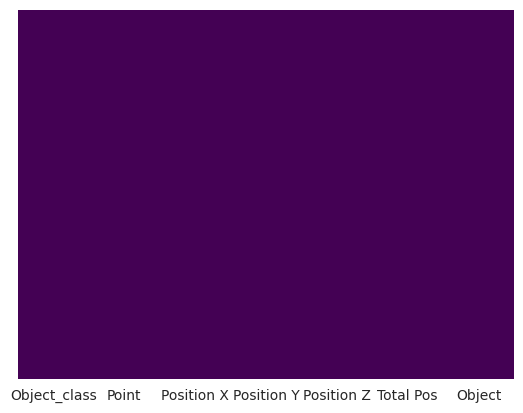

In [41]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [42]:
object_type = pd.get_dummies(df["Object"], drop_first=True)

In [43]:
df.drop(["Object"], axis=1, inplace=True)

In [44]:
df = pd.concat([df, object_type], axis=1)
df.head()

,Object_class,Point,Position X,Position Y,Position Z,Total Pos,Torus
0,0,0,1.227212,0.195510,0.244425,1.667147,True
1,0,1,1.186559,0.209833,0.011477,1.407869,True
2,0,2,1.092791,0.181580,-0.307365,0.967007,True
3,0,3,0.933728,0.188570,-0.444662,0.677635,True
4,0,4,0.806356,0.246168,-0.560302,0.492222,True


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Torus", axis=1), df["Torus"], test_size=0.30, random_state=101)

In [47]:
y_train.dropna(inplace=True)

In [48]:
y_train

46413     True
44244     True
62991    False
11081     True
62956    False
         ...  
20463     True
55293     True
49751     True
5695      True
45919     True
Name: Torus, Length: 46200, dtype: bool

In [49]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [50]:
prediction = logmodel.predict(X_test)

In [51]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2533
        True       1.00      1.00      1.00     17267

    accuracy                           1.00     19800
   macro avg       1.00      1.00      1.00     19800
weighted avg       1.00      1.00      1.00     19800



In [52]:
import pickle

In [53]:
filename = "finalised_model.sav"
pickle.dump(logmodel, open(filename, "wb"))